<a href="https://colab.research.google.com/github/tejaswini1968/SENTIMENT-ANALYSIS/blob/main/project_sentiment_analysis_single_function_naive_bayes_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT - SENTIMENT ANALYSIS ON AMAZON PRODUCT REVIEWS USING MACHINE LEARNING ALGORITHMS

# sample size 50,919 - positve,negative are 23030 each,neutral 4859

### Importing Necessary Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the Amazon Reviews data into jupyter notebook using pandas library

In [ ]:
df1 = pd.read_csv('Amazon_Unlocked_Mobile-csv.csv')
df1.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


### Renaming the column names with underscore character

In [ ]:
df1.rename(columns={'Product Name':'Product_Name','Brand Name':'Brand_Name','Review Votes':'Review_Votes'},inplace=True)
df1.head()

,Product_Name,Brand_Name,Price,Rating,Reviews,Review_Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


### Slicing the data based on number of Review votes greater than or equal to 2 - out of total 4,13,840 samples , 66,171 selected


In [ ]:
df2 = df1.loc[df1.Review_Votes >= 2]
df2.shape

(66171, 6)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66171 entries, 12 to 413803
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_Name  66171 non-null  object 
 1   Brand_Name    54811 non-null  object 
 2   Price         65099 non-null  float64
 3   Rating        66171 non-null  int64  
 4   Reviews       66125 non-null  object 
 5   Review_Votes  66171 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ MB


### Dropping the unnecessary columns

In [ ]:
df2.drop(columns=(['Product_Name','Brand_Name','Price','Review_Votes']),inplace=True)
df2.head()

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Rating,Reviews
12,5,These guys are the best! I had a little situat...
16,5,I was able to get the phone I previously owned...
22,1,I purchased this phone in December as a christ...
68,4,"First off, let me say I've been a Nokia user s..."
69,5,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


In [ ]:
df2.shape

(66171, 2)

### Finding the NaN (null) values if any

In [ ]:
df2.isnull().sum()

Rating      0
Reviews    46
dtype: int64

### Dropping the NaN values

In [ ]:
df2.dropna(inplace=True)
df2.shape

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(66125, 2)

### verifying that all the NaN values are dropped

In [ ]:
df2.isnull().sum()

Rating     0
Reviews    0
dtype: int64

### finding the unique values in the Reviews column

In [ ]:
np.unique(df2.Reviews)

array(["!!!!!Update!!!!! a year later and this phone has some serious problems......the battery life is non-existent I took it off the charger this morning with 100% battery life two hours later it's down to 10% battery life I can power the phone down for about 3 minutes and power it back up and the battery life goes up to about 30% and then 15 minutes after that it's dead. The phone randomly reboots itself several times a day. a couple of days ago I took the back off the phone and all the screws holding the phone together just popped out.. Very poorly put together. the phone seriously lags at times, I've performed a factory reset (that deletes everything) to help improve the speed of the phone but it still runs slow. the camera still works but only if I don't use the Flash. if I use the flash the phone with power off. it was an okay phone when I first brought it, but if you're looking for something long-term this is not the phone. the problems that I wrote about above, probably starte

In [ ]:
df2.head()

,Rating,Reviews
12,5,These guys are the best! I had a little situat...
16,5,I was able to get the phone I previously owned...
22,1,I purchased this phone in December as a christ...
68,4,"First off, let me say I've been a Nokia user s..."
69,5,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


### Resetting the index in the dataframe

In [ ]:
df2.reset_index(drop=True,inplace=True)
df2.head()

,Rating,Reviews
0,5,These guys are the best! I had a little situat...
1,5,I was able to get the phone I previously owned...
2,1,I purchased this phone in December as a christ...
3,4,"First off, let me say I've been a Nokia user s..."
4,5,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


### Original ratings are on the scale of 1,2,3,4,5. We can see the number of each category ratings.

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

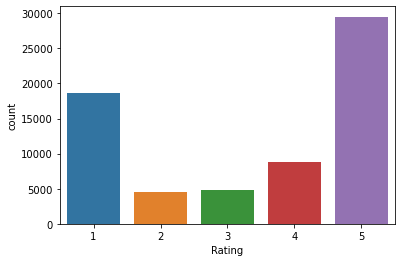

In [ ]:
sns.countplot(df2.Rating)

In [ ]:
df2.head(1)

,Rating,Reviews
0,5,These guys are the best! I had a little situat...


### Project deliverables - positive(2),neutral(1),negative(0) - we have reclassify the ratings of 1 to 5 scale into 0,1,2 categories- 1,2 ratings are negative(0), 3 rating is neutral(1), 4,5 ratings are positive(2)

In [ ]:
def custom_encoder(df):
    df.replace(to_replace=1,value=0,inplace=True)
    df.replace(to_replace=2,value=0,inplace=True)
    df.replace(to_replace=3,value=1,inplace=True)
    df.replace(to_replace=4,value=2,inplace=True)
    df.replace(to_replace=5,value=2,inplace=True)
    

### Calling the function to re-classify the Ratings column

In [ ]:
custom_encoder(df2.Rating)

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df2.head()

,Rating,Reviews
0,2,These guys are the best! I had a little situat...
1,2,I was able to get the phone I previously owned...
2,0,I purchased this phone in December as a christ...
3,2,"First off, let me say I've been a Nokia user s..."
4,2,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


In [ ]:
Amazon_data=df2

In [ ]:
Amazon_data.head()

,Rating,Reviews
0,2,These guys are the best! I had a little situat...
1,2,I was able to get the phone I previously owned...
2,0,I purchased this phone in December as a christ...
3,2,"First off, let me say I've been a Nokia user s..."
4,2,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...


### Data is not balanced - positve reviews are 38,236, negative reviews are 23,030, neutral reviews are 4,859

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

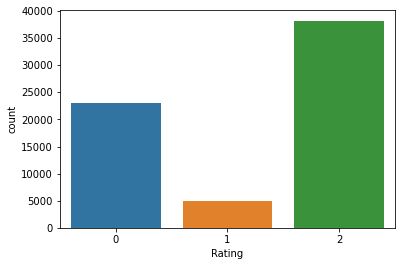

In [ ]:
sns.countplot(Amazon_data.Rating)

In [ ]:
Amazon_data.Rating.value_counts()

2    38236
0    23030
1     4859
Name: Rating, dtype: int64

In [ ]:
Amazon_data_positive = Amazon_data.loc[Amazon_data.Rating == 2]

In [ ]:
Amazon_data_positive.head()

,Rating,Reviews
0,2,These guys are the best! I had a little situat...
1,2,I was able to get the phone I previously owned...
3,2,"First off, let me say I've been a Nokia user s..."
4,2,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...
5,2,This is a solidly-built unlocked phone that is...


In [ ]:
Amazon_data_positive.shape

(38236, 2)

### Balancing the number of positive and negative reviews with equal 23,030 reviews

In [ ]:
Amazon_data_positive = Amazon_data_positive[0:23030]
Amazon_data_positive.shape

(23030, 2)

In [ ]:
Amazon_data_neg = Amazon_data.loc[Amazon_data.Rating == 0]
Amazon_data_neg.shape

(23030, 2)

In [ ]:
Amazon_data_neu = Amazon_data.loc[Amazon_data.Rating == 1]
Amazon_data_neu.shape

(4859, 2)

### Concatinating the three Series objects into single dataframe

In [ ]:
Amazon_data_final = pd.concat([Amazon_data_positive,Amazon_data_neg,Amazon_data_neu],axis=0)

### Final sample size = 50,919 - after some data wrangling

In [ ]:
Amazon_data_final.shape

(50919, 2)

C:\Users\Siva_Guddanti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

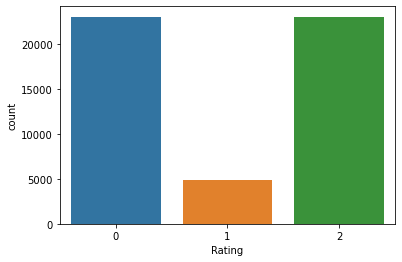

In [ ]:
sns.countplot(Amazon_data_final.Rating)

In [ ]:
Amazon_data_final.Rating.value_counts()

2    23030
0    23030
1     4859
Name: Rating, dtype: int64

In [ ]:
Amazon_data_final.head()

,Rating,Reviews
0,2,These guys are the best! I had a little situat...
1,2,I was able to get the phone I previously owned...
3,2,"First off, let me say I've been a Nokia user s..."
4,2,Nokia Asha 302 Unlocked GSM Phone with 3.2MP C...
5,2,This is a solidly-built unlocked phone that is...


### Resetting the index in the dataframe

In [ ]:
Amazon_data_final.reset_index(drop=True,inplace=True)
Amazon_data_final.index

RangeIndex(start=0, stop=50919, step=1)

In [ ]:
Amazon_data_final.tail()

,Rating,Reviews
50914,1,Cost of cell phone was a steal! Like new. Howe...
50915,1,This is a great phone for people who like flip...
50916,1,Phone was for my brother. It gets the job done...
50917,1,"It seemed to be working well, but my dad has h..."
50918,1,"I like flip phones, they are easily to use.I h..."


### Shuffling the data randomly and resetting the index

In [ ]:
Amazon_data_final = Amazon_data_final.sample(frac=1).reset_index(drop=True)

In [ ]:
Amazon_data_final.head(100)

,Rating,Reviews
0,2,So far so good
1,1,"Los Pros: Buen telefono, bastante personalizab..."
2,2,Best smartphone I've ever had! I'd used my iPh...
3,2,After purchasing the BLU brand for the first t...
4,0,"Elegant, super thin phone that is extremely fr..."
...,...,...
95,2,This is the phone ive been waiting for and fin...
96,2,"Great phone, I upgraded from Windows phone Nok..."
97,0,Rubbish I highly recommend anything else
98,2,"Excellent product, without any scratch on it. ..."


In [ ]:
Amazon_data_final.shape

(50919, 2)

In [ ]:
Amazon_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50919 entries, 0 to 50918
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rating   50919 non-null  int64 
 1   Reviews  50919 non-null  object
dtypes: int64(1), object(1)
memory usage: 795.7+ KB


### Dataset is ready

### Natural Language Processing(NLP) of the text(Reviews) data using nltk library 

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
pst = PorterStemmer()
from nltk.probability import FreqDist
fdist = FreqDist()
import re

### Importing Stopwords into a list and removing 'not' from the list

In [ ]:
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

### Single function for text preprocessing - tokenization, removing punctuation marks, turning into lower case, stemming, removing stopwords

In [ ]:
def text_preprocessing(reviews):
    all_tokens = []
    for i in range(0,len(reviews)):
        tokens = word_tokenize(reviews[i])
        all_tokens.append(tokens)
    final_corpus = []
    for i in all_tokens:
        temp_list = []
        temp_list2 = []
        for word in i:
            post_punctuation = re.sub('[^a-zA-Z]',' ',word)
            if len(post_punctuation) > 0:
                temp_list.append(post_punctuation)
        for word in temp_list:
            new_word = word.lower()
            temp_list2.append(new_word)
        post_stem = [pst.stem(word) for word in temp_list2 if not word in set(all_stopwords)]
        post_stem = ' '.join(post_stem)
        final_corpus.append(post_stem)
    return final_corpus,all_tokens

### post_punctuation = re.sub('[^a-zA-Z]',' ',word) - error corrected, space must be there in ' '

### calling function for text preprocessing 

In [ ]:
corpus,tokens = text_preprocessing(Amazon_data_final.Reviews)

In [ ]:
len(corpus)

50919

### Sample of final processed text data

In [ ]:
print(corpus[0:100])
            

['far good', 'lo pro   buen telefono   bastant personaliz   dise o anat mico   pueden descargars mucha aplicacion para sacar aun ma provecho del equipo   la pantalla tien buena sensibilidad   la camara es excelent tambien la calidad del sonido al reproducir musica   el precio es accesible lo contra   trae un instrumento para maniobrar en la pantalla   l piz stylu     vece se congela cuando se utiliza ma de una aplicacion al mismo tiempo   muestra la foto de lo contacto cuando se recib un mensaj de texto se pued insertar dato como numero dato un msj de texto sin necesidad de adjuntar crear una tarjeta de negocio como se hace con el       ', 'best smartphon  ve ever    d use iphon  s   year   final got tire phone small screen    ve gotten tire use io decid switch side world give android chanc   id admir huawei honor     thanksgiv discount final land   order one   use   day far   everyth great   emui lot featur io not blow mind bit   huawei   give high respect amaz flagship   well done hu

### finding top most frequent words in corpus with FreqDist() function

In [ ]:

for word in corpus:
    fdist[word] += 1
top_10_words_corpus = fdist.most_common(10)
print(top_10_words_corpus)

[('good', 126), ('excel', 70), ('excelent', 49), ('ok', 43), ('excel  ', 35), ('love', 31), ('great', 28), ('great product', 27), ('love phone', 27), ('phone work well   expect   issu qualiti   deliveri request import   not sure iphon  s plu model   seem shutter nois camera not silenc  ', 26)]


### sample of tokens after tokenization

In [ ]:
print(tokens[0:2])

[['So', 'far', 'so', 'good'], ['Los', 'Pros', ':', 'Buen', 'telefono', ',', 'bastante', 'personalizable', ',', 'diseño', 'anatómico', ',', 'pueden', 'descargarse', 'muchas', 'aplicaciones', 'para', 'sacar', 'aun', 'mas', 'provecho', 'del', 'equipo', ',', 'la', 'pantalla', 'tiene', 'buena', 'sensibilidad', ',', 'la', 'camara', 'es', 'excelente', 'y', 'tambien', 'la', 'calidad', 'del', 'sonido', 'al', 'reproducir', 'musica', ',', 'el', 'precio', 'es', 'accesible.Los', 'Contras', ':', 'No', 'trae', 'un', 'instrumento', 'para', 'maniobrar', 'en', 'la', 'pantalla', '(', 'lápiz', 'o', 'stylus', ')', ',', 'a', 'veces', 'se', 'congela', 'cuando', 'se', 'utiliza', 'mas', 'de', 'una', 'aplicacion', 'al', 'mismo', 'tiempo', ',', 'no', 'muestra', 'las', 'fotos', 'de', 'los', 'contactos', 'cuando', 'se', 'recibe', 'un', 'mensaje', 'de', 'texto', 'y', 'no', 'se', 'puede', 'insertar', 'datos', 'como', 'numeros', 'o', 'datos', 'a', 'un', 'msj', 'de', 'texto', 'sin', 'necesidad', 'de', 'adjuntar', 'o',

### finding top most frequent words in tokens with FreqDist() function

In [ ]:
for i in tokens:
    for word in i:
        fdist[word] += 1
top_10_words_tokens = fdist.most_common(40)
print(top_10_words_tokens)

[('.', 231471), ('the', 203870), (',', 166365), ('I', 154067), ('and', 124431), ('to', 117461), ('a', 112996), ('it', 108746), ('phone', 103260), ('is', 88445), ('this', 55221), ('for', 53776), ('of', 53214), ('with', 46471), ('that', 46093), ('not', 45103), ('was', 43476), ('in', 41969), ('on', 40490), ('my', 40049), ('!', 36145), ('you', 34918), ('but', 34891), ("n't", 34111), ('have', 33542), ('The', 29087), ('as', 24098), (')', 22793), ("'s", 22635), ('(', 21276), ('be', 20547), ('It', 19785), ('so', 19173), ('had', 17786), ('are', 17051), ('from', 17050), ('or', 17024), ('me', 17013), ('do', 16380), ('screen', 16374)]


### printing wordcloud for final_corpus words - mpl.rcParams is about the figure size to display our wordcloud


In [ ]:
import matplotlib as mpl
from wordcloud import WordCloud
mpl.rcParams['figure.figsize'] = 40,12

### we need to collect the content of final_corpus as list of words in variable list_of_words

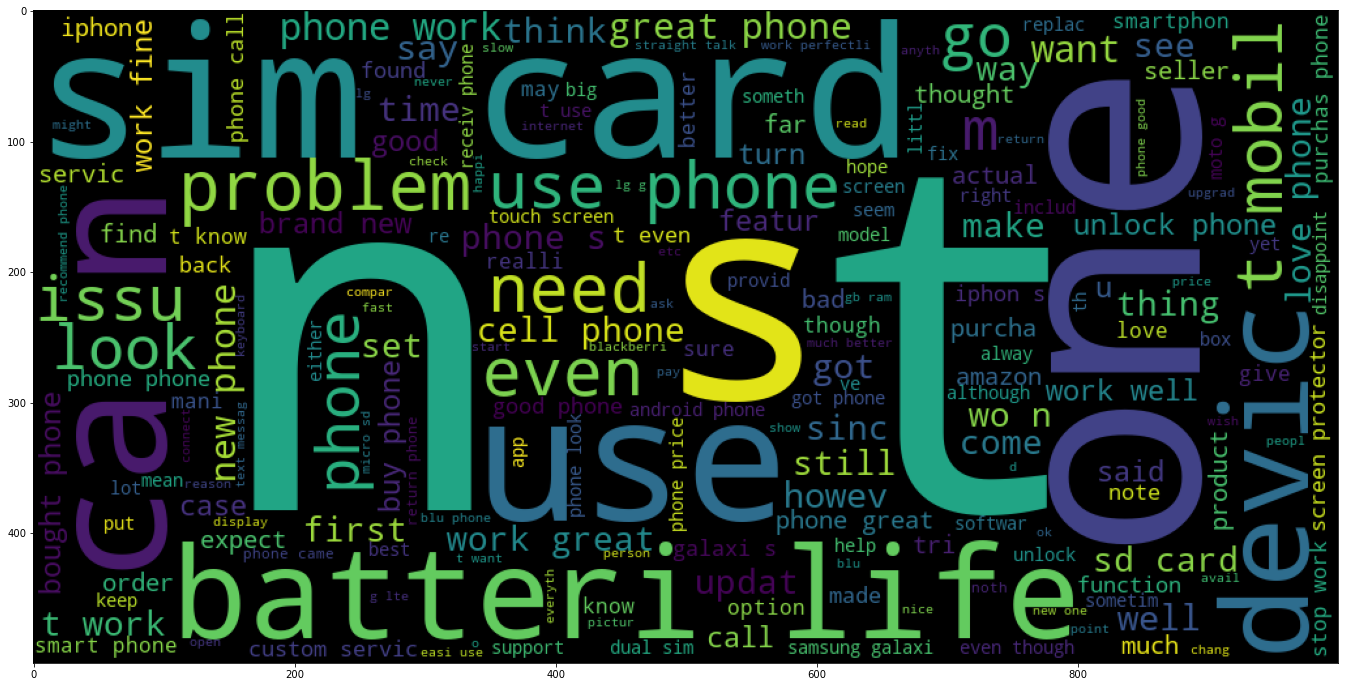

In [ ]:
list_of_words = ''
for i in corpus:
    for word in i:
        list_of_words +=' '.join(word)
all_words = WordCloud(width=1000,height=500,background_color='black',min_font_size=10).generate(list_of_words)
plt.imshow(all_words)

### Feature Extraction process from text data - Importing TFIDF Vectorizer from sklearn libray

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

### for naive bayes alogrithms  we used tfidf.fit_transform.toarray()  function

In [ ]:
feature_reviews = tfidf.fit_transform(corpus).toarray()

### Deciding independent(X - feature vector from text data) and dependent(y - Ratings) variables

In [ ]:
X = feature_reviews
y = Amazon_data_final.Rating

### Train test split in the ratio of 75:25

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### importing Gaussian Naive Bayes algorithm - this is used in case of continuous variable - here we have discrete variables

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_predict = gnb.predict(X_test)

### Process of Evaluation - Importing Evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_curve
from sklearn.metrics import plot_confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_predict)

0.4297721916732129

In [ ]:
precision_score(y_test,y_predict,average='weighted')

0.7824403329539423

In [ ]:
recall_score(y_test,y_predict,average='weighted')

0.4297721916732129

In [ ]:
f1_score(y_test,y_predict,average='weighted')

0.4989831039373863

In [ ]:
confusion_matrix(y_test,y_predict)

array([[2309, 3308,  215],
       [  94, 1098,   77],
       [ 376, 3189, 2064]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.40      0.54      5832
           1       0.14      0.87      0.25      1269
           2       0.88      0.37      0.52      5629

    accuracy                           0.43     12730
   macro avg       0.62      0.54      0.43     12730
weighted avg       0.78      0.43      0.50     12730



### importing Multinomial Naive Bayes algorithm - this is used for discrete variables - most appropriate for our data

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_predict_mnb = mnb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_mnb)

0.8326787117046347

In [ ]:
confusion_matrix(y_test,y_predict_mnb)

array([[5334,    0,  498],
       [ 633,    3,  633],
       [ 366,    0, 5263]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_predict_mnb))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      5832
           1       1.00      0.00      0.00      1269
           2       0.82      0.93      0.88      5629

    accuracy                           0.83     12730
   macro avg       0.89      0.62      0.59     12730
weighted avg       0.85      0.83      0.79     12730



### importing Bernoulli Naive Bayes algorithm -  this is used in case of binary data(only two categories) - may not be appropriate for our project data

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [ ]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [ ]:
y_predict_bnb = bnb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_bnb)

0.638177533385703

In [ ]:
confusion_matrix(y_test,y_predict_bnb)

array([[5076,  619,  137],
       [ 704,  372,  193],
       [2332,  621, 2676]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_predict_bnb))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73      5832
           1       0.23      0.29      0.26      1269
           2       0.89      0.48      0.62      5629

    accuracy                           0.64     12730
   macro avg       0.58      0.55      0.54     12730
weighted avg       0.70      0.64      0.63     12730

